# Section 1.2: Getting Started - Pandas DataFrame

* References:
  * https://pandas.pydata.org/docs/user_guide/10min.html
  * https://pandas.pydata.org/docs/user_guide/dsintro.html


## Pandas DataFrame

How to create a dataframe from an existing Python data structure:

* a numpy ndarray
* a list of lists
* a list of Namedtuples
* a list of Dictionaries


In [3]:
import numpy as np
import pandas as pd

## Anatomy of a DataFrame

A **DataFrame** is composed of one or more **Series**. The names of the **Series** form the column names, and the row labels form the **Index**.

In [16]:
meteorites = pd.read_csv('data/Meteorite_Landings.csv', nrows=5)
meteorites

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


*Source: [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)*

#### A column in a DataFrame is a Series:

In [2]:
meteorites.name

0      Aachen
1      Aarhus
2        Abee
3    Acapulco
4     Achiras
Name: name, dtype: object

#### Columns:

In [3]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### Index:

In [4]:
meteorites.index

RangeIndex(start=0, stop=5, step=1)

## Creating DataFrames

We can create DataFrames from a variety of sources such as other Python objects, flat files, webscraping, and API requests. Here, we will see just a couple of examples, but be sure to check out [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) in the documentation for a complete list.

###  Read from a CVS file : pd.read_csv()

You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.


In [18]:
import pandas as pd

meteorites = pd.read_csv('data/Meteorite_Landings.csv')

*Tip: There are many parameters to this function to handle some initial processing while reading in the file &ndash; be sure check out the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).*

You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the original page (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [20]:
broken_df = pd.read_csv('data/bikes.csv',encoding = "ISO-8859-1")
# Look at the first 3 rows
broken_df.head(3)

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


You'll notice that this is totally broken! read_csv has a bunch of options that will let us fix that, though. Here we'll

change the column separator to a ;
Set the encoding to 'latin1' (the default is 'utf8')
Parse the dates in the 'Date' column
Tell it that our dates have the day first instead of the month first
Set the index to be the 'Date' column

In [22]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


### Plotting a column
use .plot()

In [28]:
# Render our plots inline
%matplotlib inline
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

<AxesSubplot:xlabel='Date'>

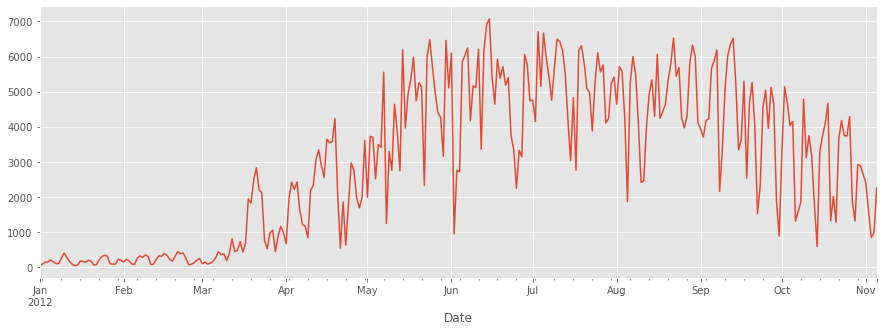

In [29]:
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot()

### Using data from an API

Collect the data from [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) using the Socrata Open Data API (SODA) with the `requests` library:

In [6]:
import requests

response = requests.get(
    'https://data.nasa.gov/resource/gh4g-9sfh.json',
    params={'$limit': 50_000}
)

if response.ok:
    payload = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    payload = None

Create the DataFrame with the resulting payload:

In [7]:
import pandas as pd

df = pd.DataFrame(payload)
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'latitude': '54.21667', 'longitude': '-113.0'}",NaN,NaN


*Tip: `df.to_csv('data.csv')` writes this data to a new file called `data.csv`.*

## Inspecting the data
Now that we have some data, we need to perform an initial inspection of it. This gives us information on what the data looks like, how many rows/columns there are, and how much data we have. 

Let's inspect the `meteorites` data.

#### How many rows and columns are there?

In [8]:
meteorites.shape

(45716, 10)

#### What are the column names?

In [9]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### What type of data does each column currently hold?

In [10]:
meteorites.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

#### What does the data look like?

In [11]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


Sometimes there may be extraneous data at the end of the file, so checking the bottom few rows is also important:

In [12]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


#### Get some information about the DataFrame

In [13]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## Extracting subsets

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

#### Selecting columns

We can select columns as attributes if their names would be valid Python variables:

In [14]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

If they aren't, we have to select them as keys. However, we can select multiple columns at once this way:

In [15]:
meteorites[['name', 'mass (g)']]

,name,mass (g)
0,Aachen,21.0
1,Aarhus,720.0
2,Abee,107000.0
3,Acapulco,1914.0
4,Achiras,780.0
...,...,...
45711,Zillah 002,172.0
45712,Zinder,46.0
45713,Zlin,3.3
45714,Zubkovsky,2167.0


#### Selecting rows

In [16]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


#### Indexing

We use `iloc[]` to select rows and columns by their position:

In [17]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


We use `loc[]` to select by name:

In [18]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


#### Filtering with Boolean masks

A **Boolean mask** is a array-like structure of Boolean values &ndash; it's a way to specify which rows/columns we want to select (`True`) and which we don't (`False`).

Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [19]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

We can use this Boolean mask to select the full row for each of these meteorites:

In [20]:
meteorites[(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.80,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
757,Dominion Range 03239,32591,Valid,L6,69.50,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
804,Dominion Range 03240,32592,Valid,LL5,290.90,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
1111,Abajo,4,Valid,H5,331.00,Found,01/01/1982 12:00:00 AM,26.80000,-105.41667,"(26.8, -105.41667)"
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,01/01/2008 12:00:00 AM,22.72192,48.95937,"(22.72192, 48.95937)"
...,...,...,...,...,...,...,...,...,...,...
45709,Zhongxiang,30406,Valid,Iron,100000.00,Found,01/01/1981 12:00:00 AM,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


*Tip: Boolean masks can be used with `loc[]` and `iloc[]`.*

An alternative to this is the `query()` method:

In [21]:
meteorites.query("`mass (g)` > 50 and fall == 'Found'")

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.80,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
757,Dominion Range 03239,32591,Valid,L6,69.50,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
804,Dominion Range 03240,32592,Valid,LL5,290.90,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
1111,Abajo,4,Valid,H5,331.00,Found,01/01/1982 12:00:00 AM,26.80000,-105.41667,"(26.8, -105.41667)"
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,01/01/2008 12:00:00 AM,22.72192,48.95937,"(22.72192, 48.95937)"
...,...,...,...,...,...,...,...,...,...,...
45709,Zhongxiang,30406,Valid,Iron,100000.00,Found,01/01/1981 12:00:00 AM,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


*Tip: Here, we can use both logical operators and bitwise operators.*

## Calculating summary statistics

In the next section of this workshop, we will discuss data cleaning for a more meaningful analysis of our datasets; however, we can already extract some interesting insights from the `meteorites` data by calculating summary statistics.

#### How many of the meteorites were found versus observed falling?

In [22]:
meteorites.fall.value_counts()

Found    44609
Fell      1107
Name: fall, dtype: int64

*Tip: Pass in `normalize=True` to see this result as percentages. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for additional functionality.*

#### What was the mass of the average meterorite?

In [23]:
meteorites['mass (g)'].median()

32.6

We can take this a step further and look at quantiles:

In [24]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.95, 0.99])

0.01        0.44
0.05        1.10
0.95     4000.00
0.99    50600.00
Name: mass (g), dtype: float64

#### What was the mass of the heaviest meteorite?

In [25]:
meteorites['mass (g)'].max()

60000000.0

Let's extract the information on this meteorite:

In [26]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

name                             Hoba
id                              11890
nametype                        Valid
recclass                    Iron, IVB
mass (g)                   60000000.0
fall                            Found
year           01/01/1920 12:00:00 AM
reclat                      -19.58333
reclong                      17.91667
GeoLocation     (-19.58333, 17.91667)
Name: 16392, dtype: object

#### How many different types of meteorite classes are represented in this dataset?

In [27]:
meteorites.recclass.nunique()

466

Some examples:

In [28]:
meteorites.recclass.unique()[:14]

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an'],
      dtype=object)

*Note: All fields preceded with "rec" are the values recommended by The Meteoritical Society. Check out [this Wikipedia article](https://en.wikipedia.org/wiki/Meteorite_classification) for some information on meteorite classes.*

#### Get some summary statistics on the data itself
We can get common summary statistics for all columns at once. By default, this will only be numeric columns, but here, we will summarize everything together:

In [29]:
meteorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,45716.000000,45716,45716,4.558500e+04,45716,45425,38401.000000,38401.000000,38401
unique,45716,NaN,2,466,NaN,2,266,NaN,NaN,17100
top,Aachen,NaN,Valid,L6,NaN,Found,01/01/2003 12:00:00 AM,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,3323,NaN,NaN,6214
mean,NaN,26889.735104,NaN,NaN,1.327808e+04,NaN,NaN,-39.122580,61.074319,NaN
std,NaN,16860.683030,NaN,NaN,5.749889e+05,NaN,NaN,46.378511,80.647298,NaN
min,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,-87.366670,-165.433330,NaN
25%,NaN,12688.750000,NaN,NaN,7.200000e+00,NaN,NaN,-76.714240,0.000000,NaN
50%,NaN,24261.500000,NaN,NaN,3.260000e+01,NaN,NaN,-71.500000,35.666670,NaN
75%,NaN,40656.750000,NaN,NaN,2.026000e+02,NaN,NaN,0.000000,157.166670,NaN


**Important**: `NaN` values signify missing data. For instance, the `fall` column contains strings, so there is no value for `mean`; likewise, `mass (g)` is numeric, so we don't have entries for the categorical summary statistics (`unique`, `top`, `freq`).

#### Check out the documentation for more descriptive statistics:

- [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

### Exercises

##### 1. Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file:

##### 2. Find the dimensions (number of rows and number of columns) in the data:

##### 3. Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

##### 4. Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip (`trip_distance`):